In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data1 = pd.read_csv('../data/processed/Cleaned_file01.csv')
data2 = pd.read_csv('../data/processed/Cleaned_file02.csv')
data3 = pd.read_csv('../data/processed/Cleaned_file03finalv2.csv')
data4 = pd.read_csv('../data/processed/Cleaned_file04.csv')
data5 = pd.read_csv('../data/processed/Cleaned_file05.csv')
data6 = pd.read_csv('../data/processed/Cleaned_file06finalv3.csv')

In [17]:
df1 = data1.copy()
df2 = data2.copy()
df3 = data3.copy()
df4 = data4.copy()
df5 = data5.copy()
df6 = data6.copy()

In [18]:
df2

,Chinese name,code name,OverrideNameTextID,NamePrefixID,OverridePartnerSkillTextID,IsPal,Tribe,BPClass,Pictorial ID,Size,...,collection,logging,Mining,OilExtraction (not shown in game),pharmaceutical,cool down,carry,pasture,Passive skill 1,Passive skill 2
0,Zoe & Lightning Bear,GYM_ElecPanda,PAL_NAME_GrassBoss,GYM_NAME_Meadow,PARTNERSKILL_lecPanda,True,EPalTribeID::ElecPanda,GYM_ElecPanda,-2,XL,...,0,2,0,0,0,0,3,0,No_skill,No_skill
1,Marcus & Horus,GYM_Horus,PAL_NAME_DessertBoss,GYM_NAME_Desert,PARTNERSKILL_orus,True,EPalTribeID::Horus,GYM_Horus,-2,XL,...,0,0,0,0,0,0,3,0,No_skill,No_skill
2,Lily & Lily Queen,GYM_LilyQueen,PAL_NAME_ForestBoss,GYM_NAME_Forest,PARTNERSKILL_ilyQueen,True,EPalTribeID::LilyQueen,GYM_LilyQueen,-2,XL,...,2,0,0,0,3,0,0,0,No_skill,No_skill
3,Axel & Pollux,GYM_ThunderDragonMan,PAL_NAME_VolcanoBoss,GYM_NAME_Volcano,PARTNERSKILL_hunderDragonMan,True,EPalTribeID::ThunderDragonMan,GYM_ThunderDragonMan,-2,XL,...,0,0,0,0,0,0,3,0,No_skill,No_skill
4,does not appear in the game,BadCatgirl,No_PAL_NAME,No_BOSS_NAME,No_Partner_Skill,True,EPalTribeID::BadCatgirl,BadCatgirl,-1,XL,...,3,1,0,0,0,0,2,0,No_skill,No_skill
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,does not appear in the game,WaterLizard,No_PAL_NAME,No_BOSS_NAME,No_Partner_Skill,True,EPalTribeID::WaterLizard,WaterLizard,-1,M,...,0,0,0,0,0,0,0,0,No_skill,No_skill
172,does not appear in the game,GuardianDog,No_PAL_NAME,No_BOSS_NAME,No_Partner_Skill,True,EPalTribeID::GuardianDog,GuardianDog,-1,S,...,0,0,0,0,0,0,0,0,No_skill,No_skill
173,does not appear in the game,GrassDragon,No_PAL_NAME,No_BOSS_NAME,No_Partner_Skill,True,EPalTribeID::GrassDragon,GrassDragon,-1,L,...,0,0,0,0,1,0,0,0,No_skill,No_skill
174,does not appear in the game,BlackFurDragon,No_PAL_NAME,No_BOSS_NAME,No_Partner_Skill,True,EPalTribeID::BlackFurDragon,BlackFurDragon,-1,L,...,0,0,0,0,0,0,3,0,No_skill,No_skill


# a. Distribution de la taille des Pals

<Axes: xlabel='Size', ylabel='count'>

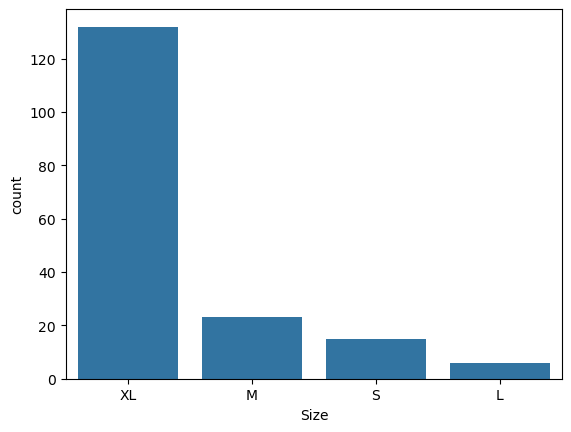

In [20]:
order = df2['Size'].value_counts().index
sns.countplot(data=df2, x='Size', order=order)

# b. Distribution des categories

C:\Users\amina\AppData\Local\Temp\ipykernel_13348\3113603908.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([label_mapping[label] for label in order], rotation=45)


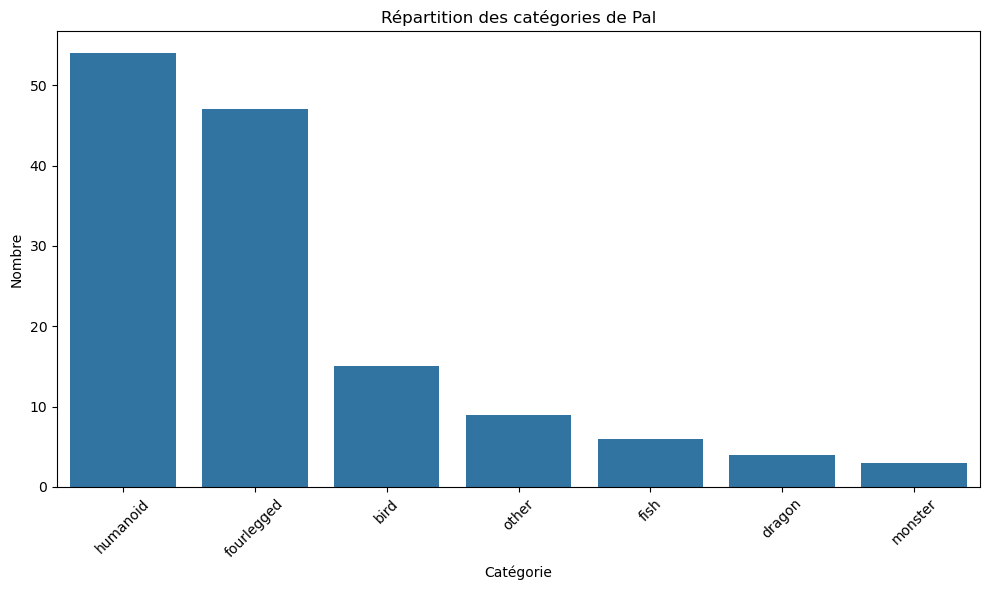

In [28]:
order = df3['GenusCategory'].value_counts().index

# Extraire la 2e partie de chaque label (après '::') pour l'affichage
label_mapping = {cat: cat.split("::")[-1] for cat in order}

# Tracer le graphe
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df3, x='GenusCategory', order=order)
ax.set_xticklabels([label_mapping[label] for label in order], rotation=45)

plt.title("Répartition des catégories de Pal")
plt.xlabel("Catégorie")
plt.ylabel("Nombre")
plt.tight_layout()
plt.show()

# b. Distribution de la consommation alimentaire 

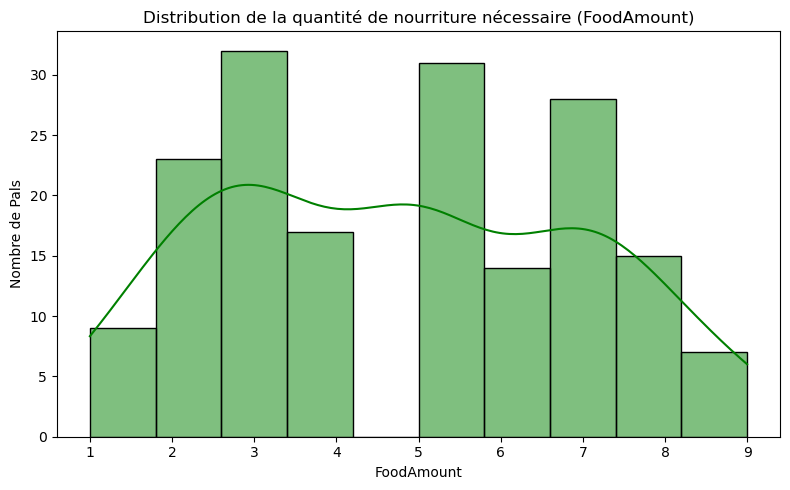

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(df2['FoodAmount'], bins=10, kde=True, color='green')
plt.title("Distribution de la quantité de nourriture nécessaire (FoodAmount)")
plt.xlabel("FoodAmount")
plt.ylabel("Nombre de Pals")
plt.tight_layout()
plt.show()

Ce qu'on observe :

    Il y a des pics nets à certaines valeurs : 1, 2, 3, jusqu’à 9.

    La distribution est discrète et regroupée par paliers fixes (entiers).

Interprétation :

    Les Pals sont répartis dans des niveaux de besoin alimentaire fixes.

    Il y a une forte concentration autour des valeurs 3, 5, et 7, ce qui indique que beaucoup de Pals ont des besoins alimentaires modérés à élevés.

    Peu de Pals nécessitent très peu (1) ou beaucoup (9) de nourriture.

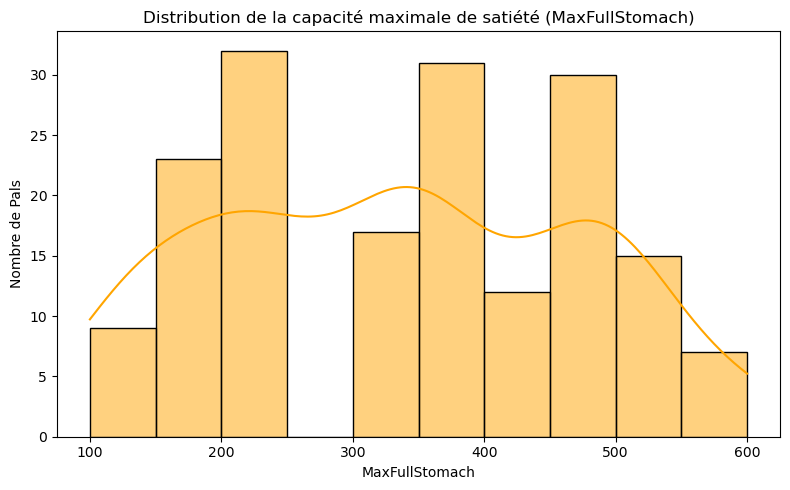

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(df2['MaxFullStomach'], bins=10, kde=True, color='orange')
plt.title("Distribution de la capacité maximale de satiété (MaxFullStomach)")
plt.xlabel("MaxFullStomach")
plt.ylabel("Nombre de Pals")
plt.tight_layout()
plt.show()

Ce qu'on observe :

    Des valeurs spécifiques reviennent souvent : 100, 150, 225, 300, 350, 400, 475, 525, 600.

    La distribution forme des pics nets, en escalier.

Interprétation :

    Le jeu ou la base de données a des valeurs standardisées de satiété maximale.

    Plus un Pal a une grande capacité (MaxFullStomach élevé), plus il peut "stocker" de nourriture.

    Les Pals ayant une capacité de 300 à 475 sont les plus fréquents → ce sont les profils équilibrés ou endurants.

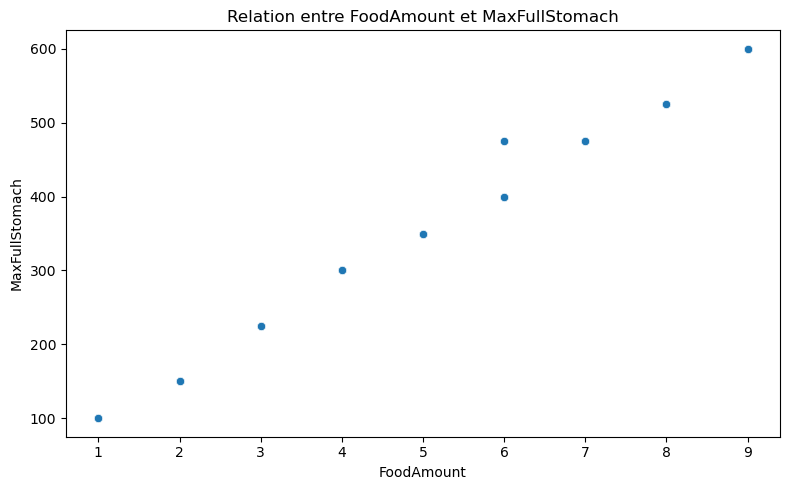

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df2, x='FoodAmount', y='MaxFullStomach')
plt.title("Relation entre FoodAmount et MaxFullStomach")
plt.xlabel("FoodAmount")
plt.ylabel("MaxFullStomach")
plt.tight_layout()
plt.show()

Ce qu'on observe :

    Il y a une corrélation linéaire faible à modérée.

    Des groupes bien distincts apparaissent : pour un même FoodAmount, plusieurs MaxFullStomach sont possibles.

Interprétation :

    Plus un Pal demande de nourriture, plus il a généralement une grande capacité de satiété (logique).

    Mais certains Pals avec une faible FoodAmount ont quand même une capacité importante → bons profils d’économie de ressources.

    Ce graphique permet de repérer les Pals efficaces (peu de nourriture pour une grande satiété).

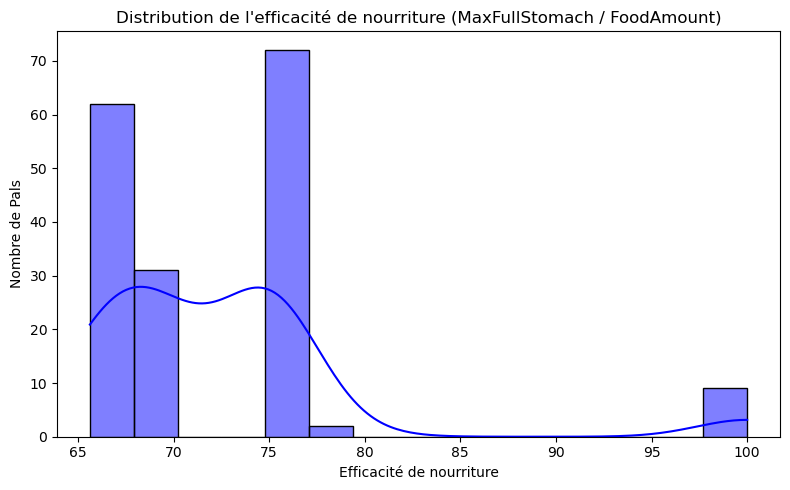

In [32]:
df2['FoodEfficiency'] = df2['MaxFullStomach'] / df2['FoodAmount']

plt.figure(figsize=(8, 5))
sns.histplot(df2['FoodEfficiency'], bins=15, kde=True, color='blue')
plt.title("Distribution de l'efficacité de nourriture (MaxFullStomach / FoodAmount)")
plt.xlabel("Efficacité de nourriture")
plt.ylabel("Nombre de Pals")
plt.tight_layout()
plt.show()

Ce qu'on observe :

    La distribution est centrée autour de 60 à 80, avec des pics marqués.

    Quelques Pals ont une efficacité au-dessus de 100, d'autres autour de 25.

Interprétation :

    Cette variable représente combien de satiété tu gagnes par unité de nourriture.

    Un Pal avec une efficacité élevée est "rentable" à nourrir.

    Les meilleurs profils sont ceux avec une efficacité > 80 : gros réservoir pour peu de nourriture → idéaux pour la survie, la logistique, ou l’élevage stratégique.

In [39]:
# Les 10 Pals les plus efficaces (valeur élevée de satiété par nourriture)
top10_efficient = df2.sort_values("FoodEfficiency", ascending=False).head(10)

# Les 10 moins efficaces
bottom10_efficient = df2.sort_values("FoodEfficiency", ascending=True).head(10)

top10_efficient['code name'] .tolist()

['BOSS_Carbunclo',
 'BOSS_Bastet',
 'BOSS_ChickenPal',
 'BOSS_CuteFox',
 'BOSS_Kelpie_Fire',
 'BOSS_Kelpie',
 'BOSS_Bastet_Ice',
 'BOSS_PlantSlime_Flower',
 'BOSS_PlantSlime',
 'GYM_ElecPanda']

Les Pals avec 100 de satiété pour 1 de nourriture sont extrêmement économes.
Idéal pour des stratégies de survie ou des fermes où la nourriture est rare.

In [40]:
bottom10_efficient['code name'].tolist()

['DarkMutant',
 'BOSS_GrassMammoth',
 'BOSS_GrassMammoth_Ice',
 'BOSS_HadesBird',
 'BOSS_Horus',
 'BOSS_DarkMutant',
 'BlackFurDragon',
 'BOSS_BlackGriffon',
 'BOSS_BlackFurDragon',
 'BOSS_Suzaku']

Bien qu’ils aient une grande capacité de satiété, ils mangent beaucoup.
Moins adaptés aux environnements où la gestion de la nourriture est critique.

# j.Rareté moyenne des Pals avec attaque max

In [41]:
top10_attack = df3.nlargest(10, 'Remote attack')
top10_attack['rarity'].mean()

13.1

# n. skills

C:\Users\amina\AppData\Local\Temp\ipykernel_13348\3927498653.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skill_sums.index, y=skill_sums.values, palette="viridis")


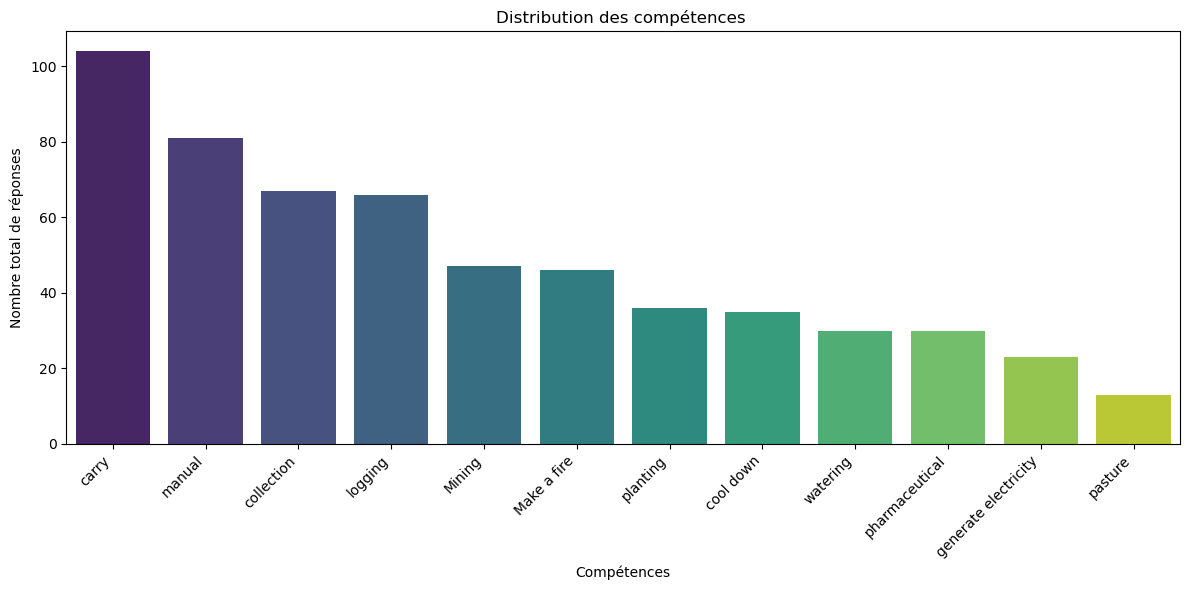

In [51]:
skill_columns = [
    'Make a fire', 'watering', 'planting', 'generate electricity', 'manual',
    'collection', 'logging', 'Mining', 'pharmaceutical', 'cool down',
    'pasture', 'carry'
]

# S'assurer que les colonnes existent bien dans df3
skill_columns = [col for col in skill_columns if col in df4.columns]

skill_sums = df4[skill_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=skill_sums.index, y=skill_sums.values, palette="viridis")

# Ici, on fixe explicitement les labels x en leur nom
plt.xticks(ticks=range(len(skill_sums)), labels=skill_sums.index, rotation=45, ha="right")

plt.xlabel("Compétences")
plt.ylabel("Nombre total de réponses")
plt.title("Distribution des compétences ")
plt.tight_layout()
plt.show()


# p. Profil des Pals nocturnes

In [42]:
df3[df3['nocturnal'] == 'yes'].describe()

,ID,rarity,4D total,HP,melee attack,Remote attack,defense,support,Speed of work,endurance,slow walking speed,walking speed,running speed,price
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.0,25.000000,25.00000,25.000000,25.000000,25.000000
mean,63.560000,5.960000,382.000000,92.800000,98.800000,99.800000,90.600000,100.400000,100.0,128.800000,80.92000,155.200000,646.600000,4221.200000
std,31.096731,5.012318,72.557449,20.056171,23.685439,23.473389,23.731133,10.598742,0.0,61.800755,25.57981,83.310163,207.187113,2810.858884
min,15.000000,1.000000,270.000000,60.000000,50.000000,60.000000,50.000000,70.000000,100.0,100.000000,10.00000,10.000000,300.000000,1000.000000
25%,40.000000,3.000000,310.000000,75.000000,90.000000,80.000000,80.000000,100.000000,100.0,100.000000,70.00000,105.000000,475.000000,1720.000000
50%,68.000000,5.000000,395.000000,95.000000,100.000000,100.000000,85.000000,100.000000,100.0,100.000000,85.00000,145.000000,700.000000,4120.000000
75%,94.000000,7.000000,430.000000,100.000000,100.000000,115.000000,100.000000,100.000000,100.0,100.000000,100.00000,160.000000,750.000000,7050.000000
max,110.000000,20.000000,515.000000,140.000000,150.000000,145.000000,140.000000,140.000000,100.0,300.000000,120.00000,350.000000,1000.000000,9060.000000


# v. Répartition des zones d'apparition

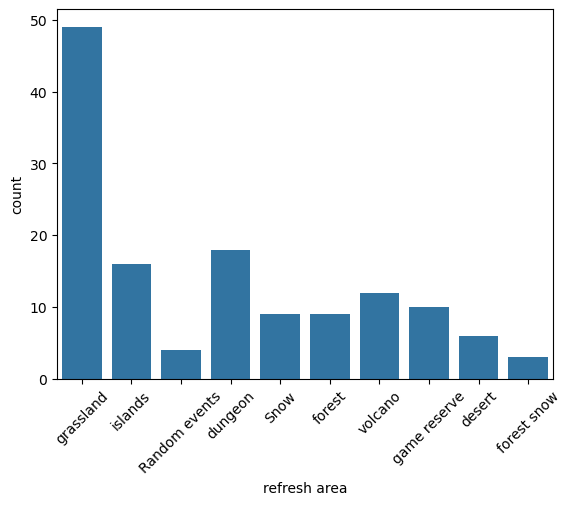

In [45]:
sns.countplot(data=df5, x='refresh area')
plt.xticks(rotation=45)  # Rotation de 45 degrés sur les labels de l'axe x
plt.show()